In [1]:
print('Hello World');

Hello World


import of required python libraries

In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import psycopg2
import pandas.io.sql as sqlio

load data from PostGIS database

database connection by using psycopg2

- current docker container should be connected to common docker network. in order to find correct host namen of postgis database equals container name

In [3]:
con_osm = psycopg2.connect(database="osm", user="postgres", password="postgres", host="ma_db_01", port="5432")
con_postgres = psycopg2.connect(database="postgres", user="postgres", password="postgres", host="ma_db_01", port="5432")
#autocommit mode - true
con_osm.autocommit = True
con_postgres.autocommit = True

<b>für Variante GIScience und IÖR-Monitor Diagramme generieren</b>

in PostgreSQL/ PostGIS die Daten per VIEW vorbereiten und dann nur noch hier visualisieren!



<h2>LU-Klassen nach Flächeninhalt</h2>


In [5]:
sql = 'SELECT lu_nr, "Anteil_Fläche" FROM auswertung_giscience;'
#df_1 = gpd.GeoDataFrame.from_postgis(sql, con_osm, geom_col='way')
df_1 = sqlio.read_sql_query(sql, con_osm)
df_1.head()

,lu_nr,Anteil_Fläche
0,5,28.40
1,8,21.81
2,1,18.75
3,7,7.72
4,0,6.29


<AxesSubplot:title={'center':'Variante GIScience'}, ylabel='Anteil_Fläche'>

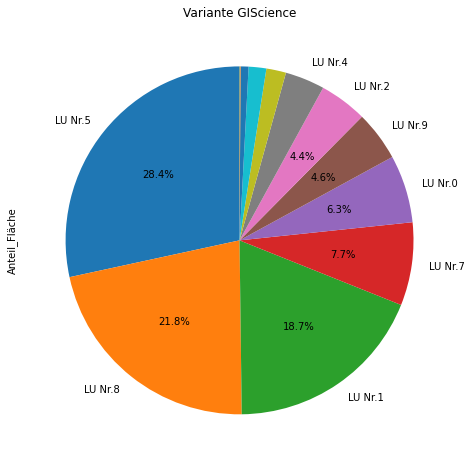

In [30]:
%matplotlib inline
def mm2inch(mm):
    return mm / 25.4

def pie_label_function(pct):
    return ('%1.1f%%' % pct) if pct > 4 else ''

def my_level_list(data, values, threshold):
   list = []
   for i in range(len(data)):
       if values[i] > threshold : #2%
           list.append('LU Nr.'+str(data[i]))
       else:
           list.append('')
   return list

df_1.plot(kind = 'pie', 
           y = 'Anteil_Fläche', 
           autopct=pie_label_function, 
           startangle=90, 
           shadow=False, 
           labels=my_level_list(df_1['lu_nr'], df_1['Anteil_Fläche'], 3), 
           legend = False, 
           fontsize=10,
           title='Variante GIScience',
           figsize=(8,8)
          )

Variante IÖR-Monitor

In [31]:
sql = 'SELECT lu_nr, "Anteil_Fläche" FROM auswertung_monitor;'
#df_1 = gpd.GeoDataFrame.from_postgis(sql, con_osm, geom_col='way')
df_2 = sqlio.read_sql_query(sql, con_osm)
df_2.head()

,lu_nr,Anteil_Fläche
0,40,28.06
1,50,23.33
2,10,18.02
3,41,7.93
4,0,4.88


<AxesSubplot:title={'center':'Variante IÖR-Monitor'}, ylabel='Anteil_Fläche'>

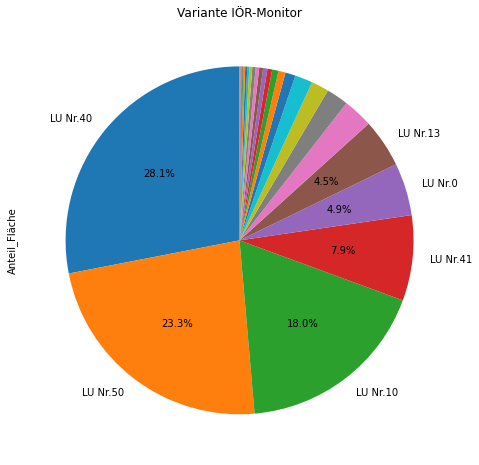

In [32]:
%matplotlib inline
def mm2inch(mm):
    return mm / 25.4

def pie_label_function(pct):
    return ('%1.1f%%' % pct) if pct > 4 else ''

def my_level_list(data, values, threshold):
   list = []
   for i in range(len(data)):
       if values[i] > threshold : #2%
           list.append('LU Nr.'+str(data[i]))
       else:
           list.append('')
   return list

df_2.plot(kind = 'pie', 
           y = 'Anteil_Fläche', 
           autopct=pie_label_function, 
           startangle=90, 
           shadow=False, 
           labels=my_level_list(df_2['lu_nr'], df_2['Anteil_Fläche'], 3), 
           legend = False, 
           fontsize=10,
           title='Variante IÖR-Monitor',
           figsize=(8,8)
          )